In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_ad = pd.read_csv('ad.csv')
df_adtitle = pd.read_csv('ad_title.csv')

In [3]:
df_ad.head()

,adId,campaignId,advertiserId
0,7867,5918,8414
1,7866,5918,8414
2,7865,5918,8414
3,7863,8343,8414
4,7862,8343,8414


In [4]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 3 columns):
adId            3256 non-null int64
campaignId      3256 non-null int64
advertiserId    3256 non-null int64
dtypes: int64(3)
memory usage: 76.4 KB


In [5]:
df_ad['adId'].nunique()

3256

In [6]:
df_ad['campaignId'].nunique()

528

In [7]:
df_adtitle.head()

,adId,wordId
0,6,24
1,6,25
2,6,26
3,6,27
4,6,28


In [8]:
df_adtitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18122 entries, 0 to 18121
Data columns (total 2 columns):
adId      18122 non-null int64
wordId    18122 non-null int64
dtypes: int64(2)
memory usage: 283.3 KB


In [9]:
df_adtitle['adId'].nunique()

3252

In [10]:
df_ad.hist(bins=30, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AAE5CB13C8>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AAE5CB15C8>,
      dtype=object)

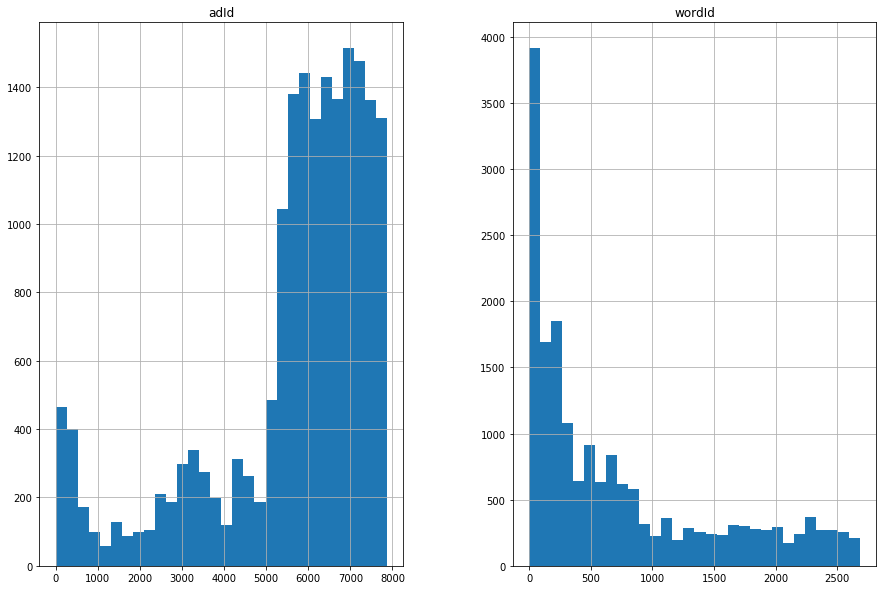

In [11]:
df_adtitle.hist(bins=30, figsize=(15, 10))

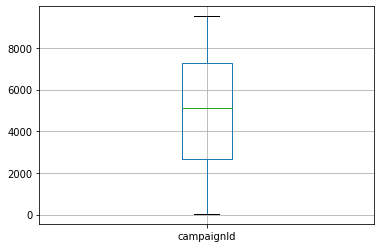

In [12]:
df_ad.boxplot(['campaignId'])

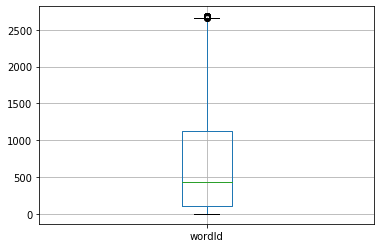

In [13]:
df_adtitle.boxplot(['wordId'])

class K_Means:

    def __init__(self,  n_clusters=3, tolerance=0.0001, max_iterations=1000):
        self.n_clusters = n_clusters
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def fit(self, X):
        n, d = X.shape[0], X.shape[1]
        self.centroids = np.random.randint(np.min(X), np.max(X), size=(self.n_clusters, d))

        for i in range(self.max_iterations):
            
            # Find the distance between the point and cluster; choose the nearest centroid
            clusters = self.get_clusters(X)
            
            # Update centroids
            prev_centroids = np.copy(self.centroids)
            for k in range(self.n_clusters):
                self.centroids[k] = np.mean([X[i] for i in range(n) if clusters[i] == k], axis=0)

            # Check convergence
            diff = np.abs((self.centroids - prev_centroids) / prev_centroids)
            if np.sum(diff) < self.tolerance:
                break
        
        return clusters
    
    def get_clusters(self, X):
        n = X.shape[0]
        # Find distance of every point from every centroid
        distance = np.array([]).reshape((n, 0))
        for k in range(self.n_clusters):
            temp = np.sum((X - self.centroids[k, :]) ** 2, axis=1).reshape((n, 1))                
            distance = np.c_[distance, temp]
        # Calculate and return nearest cluster
        return np.argmin(distance, axis=1)
        

In [47]:
X = df_ad.iloc[:, 0:2].values


In [48]:
def group_data(X, clusters, k):
    n = X.shape[0]
    groups = [np.array([]) for _ in range(k)]
    for c in range(k):
        groups[c] = np.array([X[i] for i in range(n) if clusters[i] == c])
    return groups

def plot_clusters(X, clusters, centroids):
    k = centroids.shape[0]
    color = ['lightseagreen','slateblue','slategray','lightcoral','lightgreen']
    labels = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
    groups = group_data(X, clusters, k)
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(groups[i][:,0], groups[i][:,1], c=color[i], label=labels[i])
    plt.scatter(centroids[:,0], centroids[:, 1], marker='*', s=200, c='gold', label='Centroids')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()


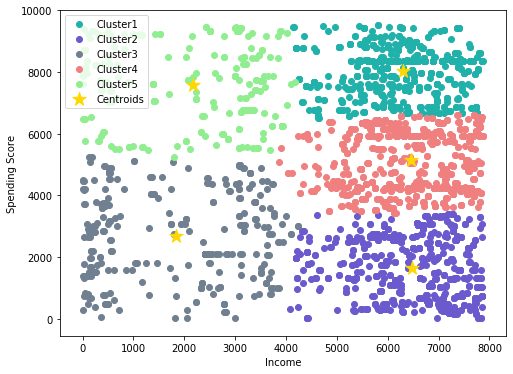

In [55]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10)
pred_y = kmeans.fit_predict(X)
plot_clusters(X, pred_y, kmeans.cluster_centers_)